<a href="https://colab.research.google.com/github/huyhoang1996vn/my-ml/blob/master/sklearn_linear_regression_multi_feature_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# https://www.datacamp.com/tutorial/sklearn-linear-regression

In [ ]:
# Read in California housing dataset.
from sklearn.datasets import fetch_california_housing


housing = fetch_california_housing()

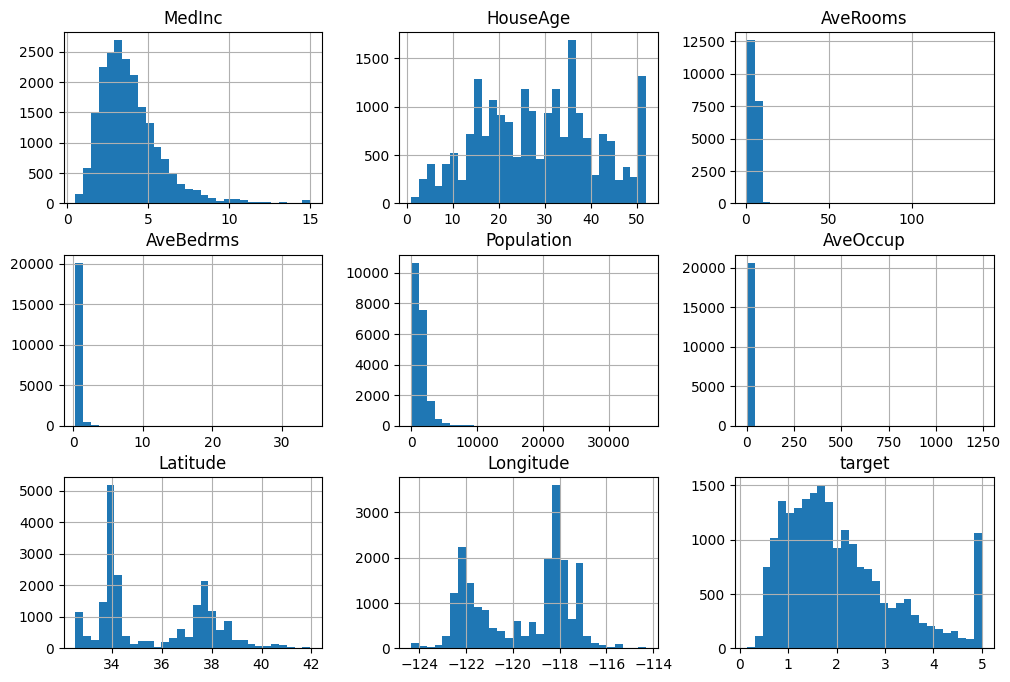

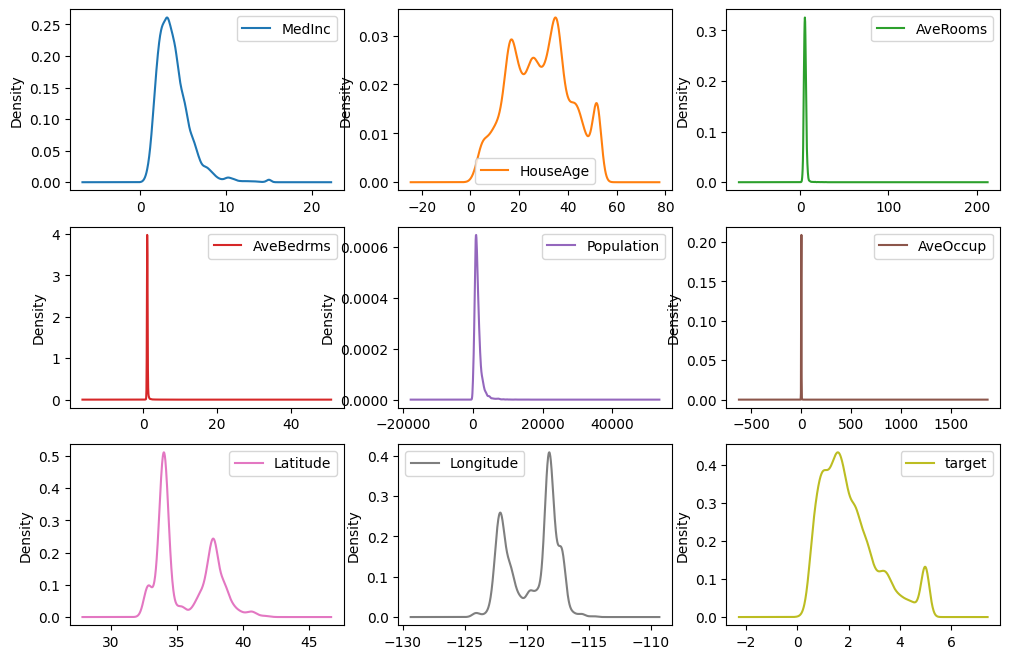

In [ ]:
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['target'] = housing.target
housing_df.describe()
housing_df.hist(figsize=(12, 8), bins=30)
housing_df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(12, 8))
plt.show()

In [ ]:
# Import train_test_split.
from sklearn.model_selection import train_test_split


# Create features X and target y.
features = pd.DataFrame(housing.data, columns=housing.feature_names)
target = housing.target  # Median house value in $100,000s
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)




In [ ]:
# Import StandardScaler.
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler.
scaler = StandardScaler()

# Fit and transform training data.
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.fit_transform(features_test)

In [ ]:
# Import LinearRegression.
from sklearn.linear_model import LinearRegression


# Instantiate linear regression model.
model = LinearRegression()
model.fit(features_train_scaled, target_train)

LinearRegression()

In [ ]:
target_predict = model.predict(features_test_scaled)
target_predict

array([0.70298353, 1.75471768, 2.72096393, ..., 4.59369185, 1.23349985,
       1.99958305])

In [ ]:
# Import metrics.
from sklearn.metrics import mean_squared_error, r2_score
r2=r2_score(target_test, target_predict)
print(f"R-squared: {r2:.4f}")
mse = mean_squared_error(target_test, target_predict)
print(f"Mean squared error: {mse:.4f}")


# Calculate and print RMSE.
rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

R-squared: 0.5888
Mean squared error: 0.5389
Root mean squared error: 0.7341


In [ ]:
import numpy as np

# Tính phạm vi của y thực tế (target_test)
y_range = np.max(target_test) - np.min(target_test)
# Tính ngưỡng 5-10% của phạm vi
good_threshold = 0.05 * y_range
acceptable_threshold = 0.10 * y_range

print(f"Phạm vi y: {y_range}")
print(f"RMSE tốt (5% phạm vi): < {good_threshold}")
print(f"RMSE chấp nhận được (10% phạm vi): < {acceptable_threshold}")
print(f"RMSE của bạn: {rmse}")

Phạm vi y: 4.85002
RMSE tốt (5% phạm vi): < 0.242501
RMSE chấp nhận được (10% phạm vi): < 0.485002
RMSE của bạn: 0.7340742410708014


In [ ]:
# Import libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Load the dataset.
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)


# Compute the correlation matrix.
corr_matrix = X.corr()

corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


<Axes: >

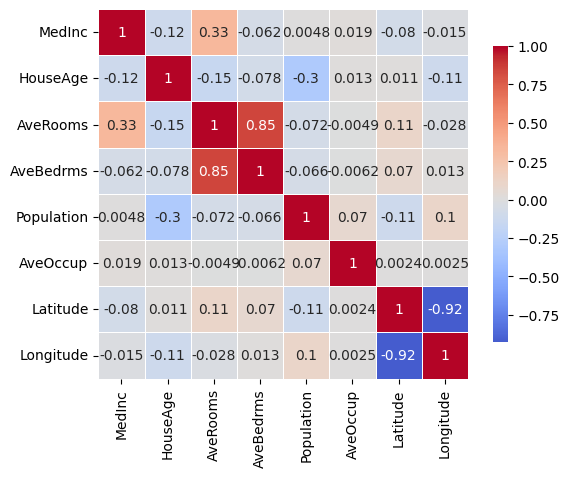

In [ ]:
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})

Are some features more relevant than others? Choosing the most relevant features from the dataset is known as feature selection.

In [ ]:

# Identify pairs of features with high collinearity (correlation > 0.8 or < -0.8).
high_corr_features = [(col1, col2, corr_matrix.loc[col1, col2])
                     for col1 in corr_matrix.columns
                     for col2 in corr_matrix.columns
                     if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > 0.8]


# Convert to a DataFrame for better visualization.
collinearity_df = pd.DataFrame(high_corr_features, columns=["Feature 1", "Feature 2", "Correlation"])
print("\nHighly Correlated Features:\n", collinearity_df)


# Compute Variance Inflation Factor (VIF) for each feature.
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


# Print VIF values.
print("\nVariance Inflation Factor (VIF) for each feature:\n", vif_data)


Highly Correlated Features:
    Feature 1  Feature 2  Correlation
0   AveRooms  AveBedrms     0.847621
1  AveBedrms   AveRooms     0.847621
2   Latitude  Longitude    -0.924664
3  Longitude   Latitude    -0.924664

Variance Inflation Factor (VIF) for each feature:
       Feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


- VIF = 1: no multicollinearity (ideal scenario).
- VIF < 5: low to moderate multicollinearity (generally acceptable).
- VIF > 5: high multicollinearity (consider removing or combining correlated variables).
- VIF > 10: severe multicollinearity (strongly suggests variable redundancy).




In [ ]:
# Remove 'Latitude' and 'Longitude' from features.
features_reduced = features.drop(['AveBedrms'], axis=1)

# Split the reduced features and target into training and testing sets.
features_train_reduced, features_test_reduced, target_train, target_test = train_test_split(
    features_reduced, target, test_size=0.2, random_state=42
)

# Scale the reduced training and testing features.
scaler_reduced = StandardScaler()
features_train_scaled_reduced = scaler_reduced.fit_transform(features_train_reduced)
features_test_scaled_reduced = scaler_reduced.transform(features_test_reduced)

# Instantiate and train a new linear regression model with reduced features.
model_reduced = LinearRegression()
model_reduced.fit(features_train_scaled_reduced, target_train)

# Make predictions using the reduced features.
target_predict_reduced = model_reduced.predict(features_test_scaled_reduced)

# Evaluate the new model.
r2_reduced = r2_score(target_test, target_predict_reduced)
mse_reduced = mean_squared_error(target_test, target_predict_reduced)
rmse_reduced = mse_reduced ** 0.5

print(f"R-squared with reduced features: {r2_reduced:.4f}")
print(f"Mean squared error with reduced features: {mse_reduced:.4f}")
print(f"Root mean squared error with reduced features: {rmse_reduced:.4f}")

R-squared with reduced features: 0.5823
Mean squared error with reduced features: 0.5473
Root mean squared error with reduced features: 0.7398


In [ ]:
print("Intercept:", model.intercept_)


coeff_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print("\nFeature Coefficients:\n", coeff_df)

Intercept: 2.0719469373788777

Feature Coefficients:
       Feature  Coefficient
0      MedInc     0.854383
1    HouseAge     0.122546
2    AveRooms    -0.294410
3   AveBedrms     0.339259
4  Population    -0.002308
5    AveOccup    -0.040829
6    Latitude    -0.896929
7   Longitude    -0.869842


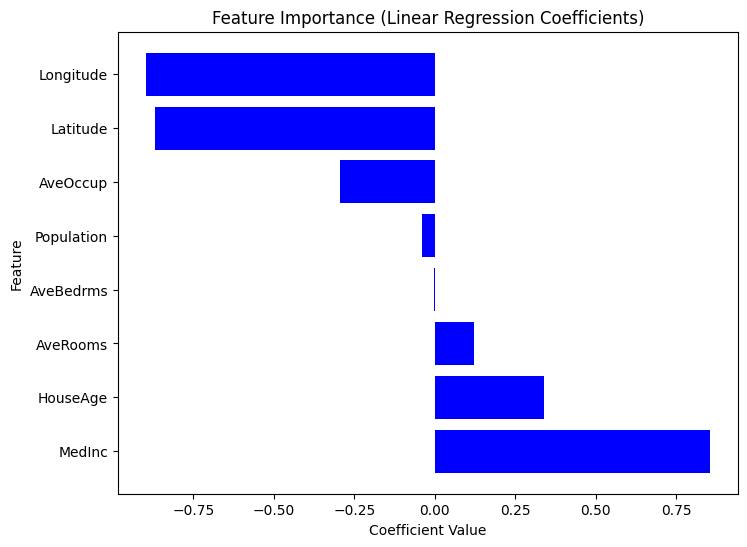

In [ ]:
# Sort dataframe by coefficients.
coef_df_sorted = coeff_df.sort_values(by="Coefficient", ascending=False)


# Create plot.
plt.figure(figsize=(8,6))
plt.barh(coeff_df["Feature"], coef_df_sorted["Coefficient"], color="blue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

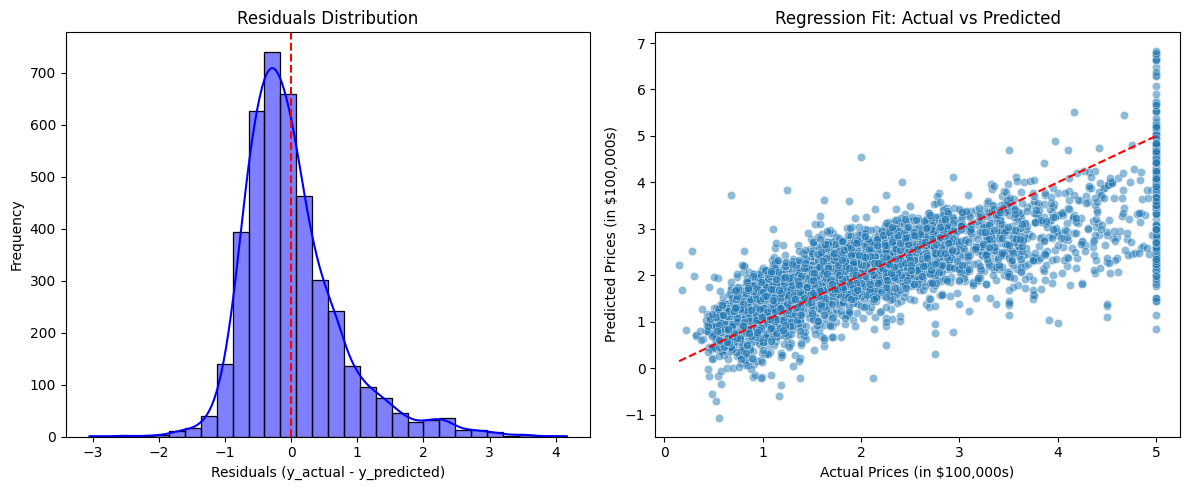

In [ ]:
# Compute residuals.
y_test = target_test
y_pred = target_predict_reduced


residuals = y_test - y_pred


# Create plots.
plt.figure(figsize=(12,5))


# Plot 1: Residuals Distribution.
plt.subplot(1,2,1)
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (y_actual - y_predicted)")
plt.ylabel("Frequency")


# Plot 2: Regression Fit (Actual vs Predicted).
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line
plt.title("Regression Fit: Actual vs Predicted")
plt.xlabel("Actual Prices (in $100,000s)")
plt.ylabel("Predicted Prices (in $100,000s)")


# Show plots.
plt.tight_layout()
plt.show()

The residuals distribution (left plot) should be centered around zero, indicating that errors are randomly distributed.

The regression fit (right plot) compares actual vs. predicted values, with the red dashed line representing a perfect fit.